# Imports

In [ ]:
!pip install mlxtend  --upgrade
!pip install pyECLAT

In [ ]:
import math
import io
import os

import numpy as np
import pandas as pd
import scipy.stats as ss
import seaborn as sns
import matplotlib.pyplot as plt

# New packages for us
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

import pyECLAT

# New package
from sklearn import tree

np.set_printoptions(legacy='1.25')

# Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

pathname = "/content/drive/My Drive/STAT 223/"
os.chdir(pathname)

Mounted at /content/drive


In [ ]:
dt = pd.read_csv('marketBasket_Lab9.csv')

dt.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
0,Milk,Eggs,Bread,Cookies,Beer,Cereal,Pop,Soup,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Milk,Cookies,Pop,Pizza,Fruit,Vegetables,Eggs,Hamburger,Beer,NaN,NaN,NaN,NaN,NaN,NaN
2,Fruit,Bread,Pop,Wine,Cold Cuts,Pizza,Cereal,Milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Beer,Pizza,Eggs,Vegetables,Milk,Cereal,Cookies,Hamburger,Water,Bread,Cold Cuts,Soup,NaN,NaN,NaN
4,Pizza,Pop,Hamburger,Milk,Cereal,Soup,Fruit,Eggs,Vegetables,Beer,NaN,NaN,NaN,NaN,NaN


In [ ]:
items = set()

for col in dt:
    items.update(dt[col].dropna().unique())

In [ ]:
items

{'Beer',
 'Bread',
 'Cereal',
 'Cold Cuts',
 'Cookies',
 'Eggs',
 'Fruit',
 'Hamburger',
 'Milk',
 'Pizza',
 'Pop',
 'Soup',
 'Vegetables',
 'Water',
 'Wine'}

In [ ]:
mlb = pd.read_csv("/content/drive/My Drive/STAT 223/MLBTeams.csv")

# Data Prep

In [ ]:
# One Hot Encoding

itemset = set(items)

encoded_vals = []

for index, row in dt.iterrows():
    rowset = set(row)
    labels = {}
    uncommons = list(itemset - rowset)
    commons = list(itemset.intersection(rowset))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)

df = pd.DataFrame(encoded_vals)

df.head()

,Fruit,Hamburger,Cold Cuts,Wine,Pizza,Vegetables,Water,Soup,Pop,Cereal,Eggs,Milk,Beer,Bread,Cookies
0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1
1,1,1,0,0,1,1,0,0,1,0,1,1,1,0,1
2,1,0,1,1,1,0,0,0,1,1,0,1,0,1,0
3,0,1,1,0,1,1,1,1,0,1,1,1,1,1,1
4,1,1,0,0,1,1,0,1,1,1,1,1,1,0,0


            Counts       Items
Fruit         5465       Fruit
Hamburger     6101   Hamburger
Cold Cuts     5904   Cold Cuts
Wine          4910        Wine
Pizza         6467       Pizza
Vegetables    5030  Vegetables
Water         4803       Water
Soup          5532        Soup
Pop           7411         Pop
Cereal        5643      Cereal
Eggs          5619        Eggs
Milk          7186        Milk
Beer          6645        Beer
Bread         7026       Bread
Cookies       6450     Cookies


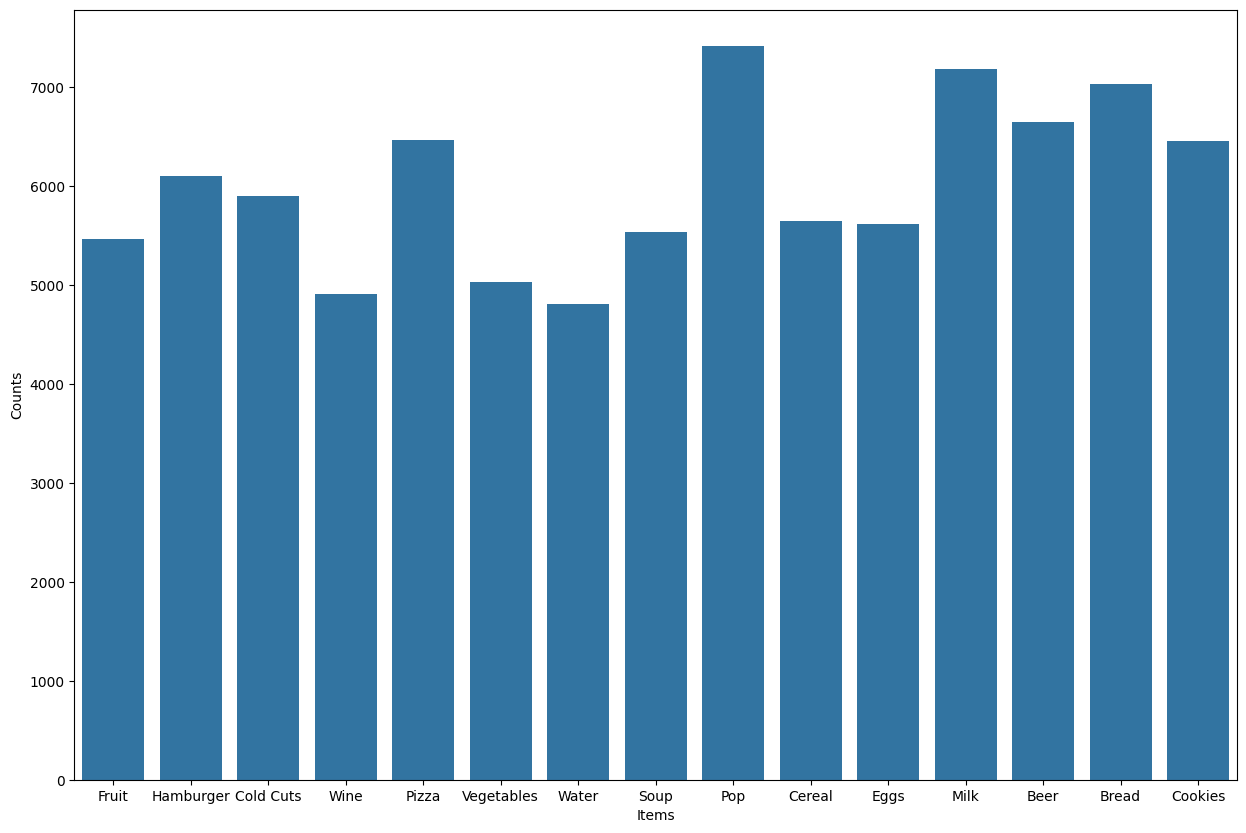

In [ ]:
# Plot to see the data

frequencies = df.sum(axis=0)
dtCounts = pd.DataFrame( frequencies, columns=['Counts'] )
dtCounts["Items"] = list(df)

print(dtCounts)

plt.figure(figsize=(15,10))
sns.barplot(x = 'Items', y = 'Counts', data = dtCounts) ;

In [ ]:
freqItems = apriori(df, min_support=0.25, use_colnames=True)

with pd.option_context('display.max_rows', None):
    print(freqItems)

     support                     itemsets
0     0.5465                      (Fruit)
1     0.6101                  (Hamburger)
2     0.5904                  (Cold Cuts)
3     0.4910                       (Wine)
4     0.6467                      (Pizza)
5     0.5030                 (Vegetables)
6     0.4803                      (Water)
7     0.5532                       (Soup)
8     0.7411                        (Pop)
9     0.5643                     (Cereal)
10    0.5619                       (Eggs)
11    0.7186                       (Milk)
12    0.6645                       (Beer)
13    0.7026                      (Bread)
14    0.6450                    (Cookies)
15    0.3234           (Fruit, Hamburger)
16    0.3093           (Fruit, Cold Cuts)
17    0.2665                (Fruit, Wine)
18    0.3272               (Fruit, Pizza)
19    0.2993          (Fruit, Vegetables)
20    0.2778               (Fruit, Water)
21    0.2953                (Soup, Fruit)
22    0.3905                 (Frui

/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
rules = association_rules(freqItems, metric='confidence', min_threshold=0.7, support_only=False)

rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Fruit),(Pop),0.5465,0.7411,0.3905,0.714547,0.964171,1.0,-0.014511,0.906980,-0.075736,0.435291,-0.102560,0.620733
1,(Fruit),(Milk),0.5465,0.7186,0.3862,0.706679,0.983411,1.0,-0.006515,0.959358,-0.035864,0.439413,-0.042364,0.622056
2,(Hamburger),(Pop),0.6101,0.7411,0.4532,0.742829,1.002333,1.0,0.001055,1.006723,0.005970,0.504677,0.006678,0.677176
3,(Cold Cuts),(Pop),0.5904,0.7411,0.4339,0.734925,0.991668,1.0,-0.003645,0.976706,-0.020099,0.483400,-0.023849,0.660203
4,(Cold Cuts),(Milk),0.5904,0.7186,0.4176,0.707317,0.984299,1.0,-0.006661,0.961450,-0.037485,0.468477,-0.040096,0.644224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,"(Cookies, Cereal)",(Milk),0.3569,0.7186,0.2558,0.716727,0.997394,1.0,-0.000668,0.993389,-0.004046,0.312065,-0.006655,0.536349
65,"(Milk, Eggs)",(Bread),0.4127,0.7026,0.2903,0.703417,1.001162,1.0,0.000337,1.002753,0.001977,0.351879,0.002746,0.558298
66,"(Eggs, Bread)",(Milk),0.3981,0.7186,0.2903,0.729214,1.014770,1.0,0.004225,1.039196,0.024182,0.351283,0.037718,0.566597
67,"(Cookies, Eggs)",(Milk),0.3530,0.7186,0.2596,0.735411,1.023394,1.0,0.005934,1.063535,0.035331,0.319704,0.059740,0.548334


In [ ]:
rules.sort_values(by="lift")

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
13,(Water),(Pop),0.4803,0.7411,0.3371,0.701853,0.947042,1.0,-0.018850,0.868364,-0.097146,0.381205,-0.151591,0.578359
55,"(Eggs, Bread)",(Pop),0.3981,0.7411,0.2798,0.702838,0.948372,1.0,-0.015232,0.871243,-0.082943,0.325576,-0.147785,0.540193
57,"(Milk, Bread)",(Pop),0.5047,0.7411,0.3556,0.704577,0.950718,1.0,-0.018433,0.876370,-0.094742,0.399461,-0.141070,0.592202
11,(Vegetables),(Pop),0.5030,0.7411,0.3561,0.707952,0.955272,1.0,-0.016673,0.886499,-0.086098,0.401014,-0.128033,0.594227
37,"(Cold Cuts, Milk)",(Pop),0.4176,0.7411,0.2961,0.709052,0.956756,1.0,-0.013383,0.889849,-0.072019,0.343265,-0.123786,0.554296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,"(Eggs, Bread)",(Milk),0.3981,0.7186,0.2903,0.729214,1.014770,1.0,0.004225,1.039196,0.024182,0.351283,0.037718,0.566597
22,(Eggs),(Milk),0.5619,0.7186,0.4127,0.734472,1.022088,1.0,0.008919,1.059777,0.049328,0.475570,0.056405,0.654392
67,"(Cookies, Eggs)",(Milk),0.3530,0.7186,0.2596,0.735411,1.023394,1.0,0.005934,1.063535,0.035331,0.319704,0.059740,0.548334
30,"(Hamburger, Pizza)",(Beer),0.3895,0.6645,0.2743,0.704236,1.059799,1.0,0.015477,1.134351,0.092423,0.351802,0.118439,0.558514


# Decision Tree

In [ ]:
features = mlb[['HR', 'BA', 'SO', 'ERA']]
target = mlb['DivWin']

In [ ]:
from sklearn.model_selection import train_test_split

featuresTrain, featuresTest, targetTrain, targetTest = train_test_split(features, target, test_size=0.33, random_state=99)

In [ ]:
### Train the tree classifier

mlbTree = tree.DecisionTreeClassifier()           # defining decision tree classifier (basic)
mlbTree = mlbTree.fit(featuresTrain, targetTrain)   # fit model on training data

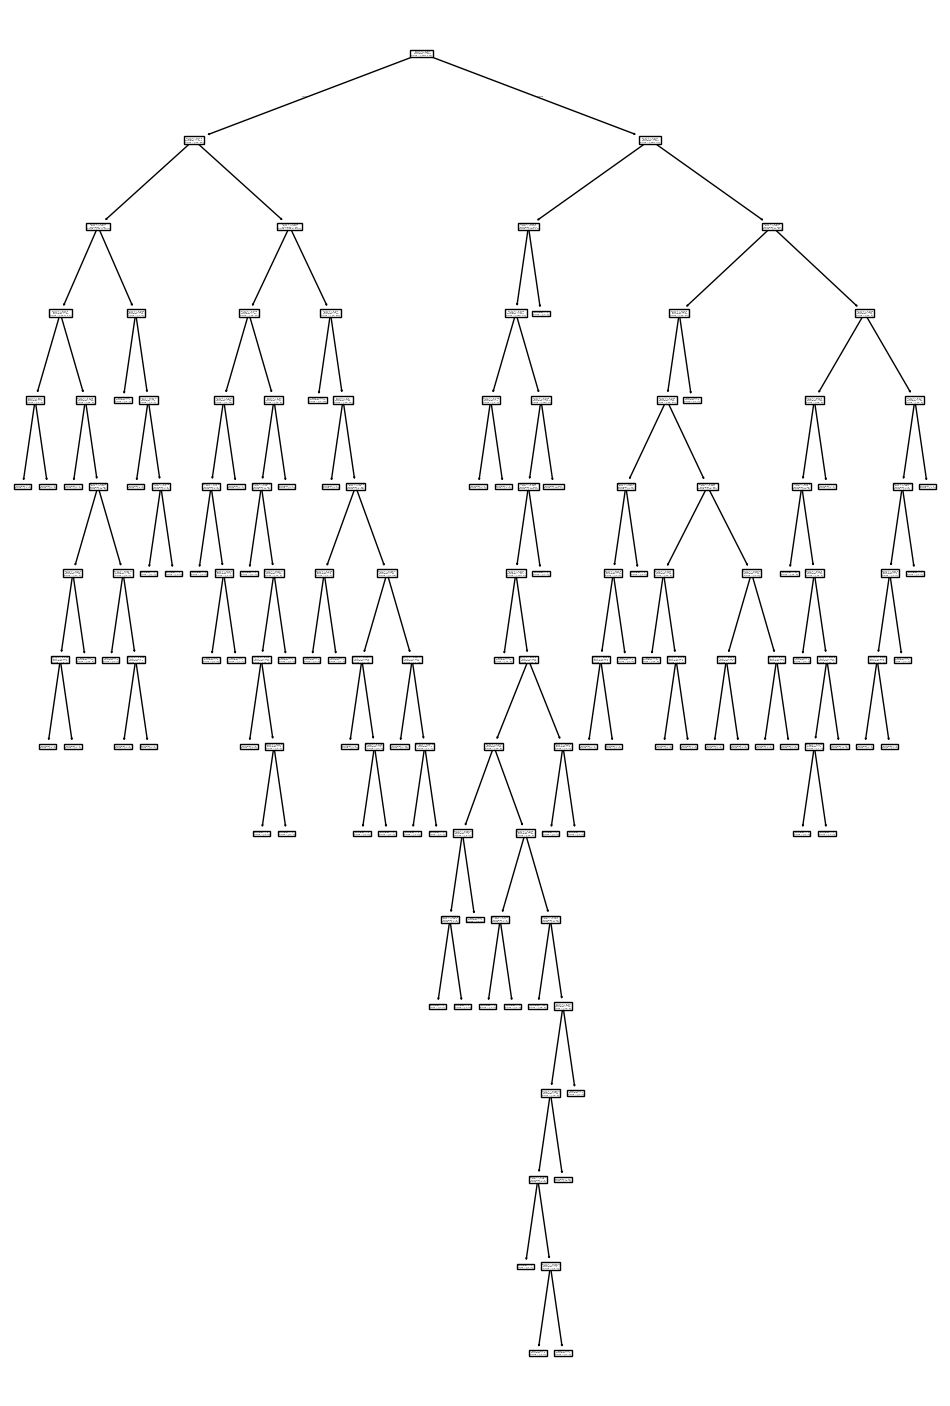

In [ ]:
plt.figure(figsize=(12, 18))
tree.plot_tree(mlbTree);

In [ ]:
prediction = mlbTree.predict(featuresTest)
accuracy = round(np.sum(targetTest == prediction) / len(targetTest) * 100, 1)

In [ ]:
accuracy

80.1

In [ ]:
mlbTree3 = tree.DecisionTreeClassifier(max_depth=3)
mlbTree3 = mlbTree3.fit(featuresTrain, targetTrain)

In [ ]:
prediction3 = mlbTree3.predict(featuresTest)
accuracy3 = round(np.sum(targetTest == prediction3) / len(targetTest) * 100, 1)

In [ ]:
accuracy3

82.7